IA & Data science (LU3IN0226) -- 2021-2022
--------
*&copy; Equipe pédagogique: Vincent Guigue, Christophe Marsala, Olivier Schwander.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

KORRABI Madjid - RANDRIANARISOA Roman

<b>Ce projet peut être fait en binôme (et c'est fortement conseillé) ou tout seul.</b>
Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

<b>Les groupes de plus de 2 personnes ne sont pas autorisés.</b>

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-2</tt> et rajouter à la suite de <tt>projet-2</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-2-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 2 - avril-mai 2022


<font size="+1" color="RED"><b>Date de rendu : lundi 9 mai, 19h au plus tard</b></font>
    
(<b>attention! le site Moodle ferme à 19h pile !</b> prévoyez de vous y connecter au moins 15mn avant la fermeture...)


Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les données Agribalise qui sont des données ouvertes dont la documentation peut être consultée ici : https://doc.agribalyse.fr/documentation/acces-donnees

Très important : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- projet/
              -- ce_notebook.ipynb
              -- Donnees_Agribalyse/
                  -- detail_ingredient.csv
                  -- detail_etape.csv
                  -- synthese.csv

Dans le notebook, le chargement des fichiers de données considèrera donc cette arborescence.

## Travail à faire

Appliquer les algorithmes d'apprentissage vus tout au long du semestre sur les données afin de mettre en évidence des résultats intéressants.
Deux problèmes, au moins, doivent être traités:
- un problème d'apprentissage supervisé
- un problème d'apprentissage non supervisé


## Travail à rendre
Ce qui doit être remis avant la date limite : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce notebook complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre librairie iads sous la forme d'une archive du répertoire iads/
- un fichier PDF dont le nom est de la forme: *projet-1-Nom1_Nom2.pdf* qui correspond à un poster décrivant l'ensemble des expérimentations menées et les résultats obtenus.


<b>IMPORTANT</b>: Les fichiers de données ne doivent pas être inclus dans votre archive !

## Soutenance des projets
La soutenance sera organisée après la semaine d'examens de mai entre le 17 et le 25 mai (la date sera précisé sur le forum du Moodle).

La <b>soutenance est obligatoire</b> : tout projet pour lequel une soutenance n'a pas eu lieu sera noté $0$.

Modalités de la soutenance:
- durée de la soutenance : 10 mn pour un binôme, 7 mn pour un monôme ;
- elle a lieu devant un ordinateur avec le notebook et le poster comme support ;
    - elle commence par une rapide présentation des expérimentations réalisées et résultats obtenus (max. 4 à 5mns)
    - puis elle se poursuit par des questions posées individuellement aux membres du binômes sur les expériences ou le code python réalisé.
- la note de soutenance est individuelle pour chaque membre d'un binôme.




## Exemples

In [38]:
# Importation des librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
%matplotlib inline  

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire frère du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as cl
from iads import k_mean as k
from iads import evaluation as evalu

# importation de utils
from iads import utils as ut

# importation de Clustering
from iads import Clustering as clust

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data_synthese = pd.read_csv("Donnees_Agribalyse/synthese.csv")
data_synthese.columns
print("Nombre de lignes: ",len(data_synthese))


Nombre de lignes:  2479


In [3]:
data_synthese.loc[0:5]

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,Saisonnalité,Transport par avion (1 : par avion),Livraison,Matériau d'emballage,...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
0,13712,13712,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, égoutté","Apricot, canned in light syrup, drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
1,13713,13713,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, non égoutté","Apricot, canned in light syrup, not drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726
2,13714,13714,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, égoutté","Apricot, in syrup, canned, drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
3,13715,13715,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, non égoutté","Apricot, in syrup, canned, not drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726
4,13000,13000,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot, dénoyauté, cru","Apricot, pitted, raw",mix de consommation FR,0,Ambiant (moyenne),LPDE,...,0.061462,0.007254,0.025954,0.204244,0.943669,43.838644,41.957928,1.412878,17.123820,2.173328
5,13001,13001,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot, dénoyauté, sec","Apricot, pitted, dried",mix de consommation FR,0,Ambiant (moyenne),LPDE,...,0.315730,0.041668,0.156978,1.036479,4.955795,248.627750,260.488540,7.717328,184.622520,11.016019


In [4]:
data_ingredient = pd.read_csv("Donnees_Agribalyse/detail_ingredient.csv")
data_ingredient.columns
print("Nombre de lignes: ",len(data_ingredient))

Nombre de lignes:  5671


In [5]:
data_ingredient.loc[0:5]

,Ciqual AGB,Ciqual code,Nom Français,Groupe d'aliment,Sous-groupe d'aliment,LCI Name,Ingredients,Score unique EF (mPt/kg de produit),Changement climatique (kg CO2 eq/kg de produit),Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit),...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
0,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Jaune d'œuf,0.039743,0.164754,0.014089,...,0.046616,0.006761,0.029441,0.052027,1.329230,16.984964,7.404112,0.337769,1.475548,0.251356
1,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Ail,0.004417,0.011444,0.002512,...,0.000781,0.000105,0.000328,0.004760,0.189983,1.643787,1.216336,0.291209,0.229937,0.084028
2,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Jus de citron,0.019375,0.061230,0.007842,...,0.006365,0.000951,0.003573,0.016918,0.213721,3.707242,2.625043,1.445978,0.793865,0.203959
3,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Huile d'olive,0.445364,1.161825,0.136467,...,0.142041,0.021524,0.088459,0.554361,9.263219,7.579606,464.100950,9.374618,12.100965,4.424012
4,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Autres étapes,0.080761,0.571172,0.126768,...,0.024611,0.002630,0.008368,0.090374,1.295442,4.529954,11.433712,0.759522,22.626111,1.278583
5,24664,24664,Gâteau aux amandes type financier,produits céréaliers,gâteaux et pâtisseries,Almond cake,Amande,0.349367,0.914647,0.070591,...,0.098041,0.012824,0.046970,0.406947,4.767077,64.110420,49.548089,27.024469,11.359491,8.104749


In [6]:
data_etape = pd.read_csv("Donnees_Agribalyse/detail_etape.csv")
data_etape.columns
print("Nombre de lignes: ",len(data_etape))

Nombre de lignes:  2480


In [7]:
data_etape.loc[0:5]

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,DQR,Nom et code,Score unique EF (mPt / kg de produit) - Agriculture,Score unique EF (mPt / kg de produit) - Transformation,...,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Agriculture,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transformation,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Emballage,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transport,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Supermarché et distribution,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Consommation,DQR - P,DQR - TiR,DQR - GR,DQR - TeR
0,12112,12112,lait et produits laitiers,fromages,Abondance,"Abondance cheese, from cow's milk",2.24,Abondance (12112),0.470679,0.046274,...,2.855985,0.552672,0.108718,0.985193,0.148203,0.042714,2.84,2.05,1.18,2.87
1,13712,13712,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, égoutté","Apricot, canned in light syrup, drained",2.46,"Abricot au sirop léger, appertisé, égoutté (13...",0.061297,0.075215,...,1.281828,0.477989,0.220289,0.679414,0.263117,0.015426,2.25,3.62,1.96,2.01
2,13713,13713,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, non égoutté","Apricot, canned in light syrup, not drained",2.46,"Abricot au sirop léger, appertisé, non égoutté...",0.038249,0.046934,...,0.799861,0.298265,0.137461,0.423954,0.164185,0.000000,2.25,3.62,1.96,2.01
3,13714,13714,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, égoutté","Apricot, in syrup, canned, drained",2.46,"Abricot au sirop, appertisé, égoutté (13714)",0.061297,0.075215,...,1.281828,0.477989,0.220289,0.679414,0.263117,0.015426,2.25,3.62,1.96,2.01
4,13715,13715,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, non égoutté","Apricot, in syrup, canned, not drained",2.44,"Abricot au sirop, appertisé, non égoutté (13715)",0.038249,0.046934,...,0.799861,0.298265,0.137461,0.423954,0.164185,0.000000,2.21,3.65,1.92,1.97
5,13000,13000,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot, dénoyauté, cru","Apricot, pitted, raw",2.20,"Abricot, dénoyauté, cru (13000)",0.061101,0.000000,...,1.277733,0.000000,0.150130,0.533833,0.205231,0.006400,1.96,3.54,1.66,1.66


# Contexte général:
## Données Agribalyse et application:
Les données Agribalyse ont été mises à disposition afin de favoriser une transition écologique dans les secteurs des produits agricoles et alimentaires. C'est donc dans ce contexte que nous allons poursuivre notre étude.

# Problème d'apprentissage supervisé:
## Peut-on prévoir l'impact environnemental d'un nouvel ingrédient ?
Pour cette partie nous allons étudier un problème d'apprentissage supervisé. La première étape est de filtrer les attributs de la base qui nous intéressent pour utiliser un Classifieur: les attributs numériques.

In [20]:
new_data_ingredient=copy.deepcopy(data_ingredient)
data_ingredient_desc=np.array(new_data_ingredient.loc[:,~new_data_ingredient.columns.isin(["Score unique EF (mPt/kg de produit)","Ciqual AGB","Ciqual code","Ingredients","Nom Français","Groupe d'aliment","Sous-groupe d'aliment","LCI Name","LCI Name"])])
data_ingredient_score = new_data_ingredient["Score unique EF (mPt/kg de produit)"]

Nous nous occupons ensuite de créer les labels et de les associer à chaque exemple du Dataset. Les scores EF prennent des valeurs entières. Afin de nous retrouver dans un problème de classification supervisée binaire nous avons décidé de créer un seuil. Ce seuil nous permettra de distinguer les bons scores des mauvais

In [21]:
# On créé le seuil de distinction

mean_score = data_ingredient_score.mean()
print("Seuil:",mean_score)

Seuil: 0.0945349166117563


On s'occupe ensuite de créer et affecter les labels à chaque exemple. Ici la classe 1 correspond aux bons scores EF et la classe -1 correspond aux mauvais scores EF.

In [22]:
# On créé les labels

list_ingredient_score  = data_ingredient_score.values.tolist()
data_ingredient_label = np.array(list(1 if elt < mean_score else -1 for elt in list_ingredient_score ))
train_len = 2*(len(data_ingredient_desc)//3)
max_index = len(data_ingredient_label)
index_tab = []
for i in range(max_index):
    index_tab.append(i)
np.random.shuffle(index_tab)
data_ingredient_desc = data_ingredient_desc[index_tab]
data_ingredient_label = data_ingredient_label[index_tab]

In [23]:
# Initialisation de diverses variables utiles

dim = len(data_ingredient_desc[0])
eps = 5e-10
iterations = 3

# Validation croisée avec Perceptron Biais:

In [24]:
for i in range(iterations):
    data_ingredient_desc_train, data_ingredient_label_train, data_ingredient_desc_test,data_ingredient_label_test = evalu.crossval_strat(data_ingredient_desc,data_ingredient_label,iterations,i)
    ingredients_knn = cl.ClassifierPerceptronBiais(dim,eps)
    ingredients_knn.train(data_ingredient_desc_train,data_ingredient_label_train)
    print("Taux de bonne classification sur le dataset du classifier Perceptron Biais a l'iteration ",i," : ",ingredients_knn.accuracy(data_ingredient_desc_test,data_ingredient_label_test))

Taux de bonne classification sur le dataset du classifier Perceptron Biais a l'iteration  0  :  0.48994708994708996
Taux de bonne classification sur le dataset du classifier Perceptron Biais a l'iteration  1  :  0.21805792163543442
Taux de bonne classification sur le dataset du classifier Perceptron Biais a l'iteration  2  :  0.02433862433862434


Nous remarquons qu'avec ce classifieur la classification n'est pas bonne. Même si on ne peut pas directement l'interpréter, une première intuition serait que les données ne peuvent pas être distinguées grâce à un Hyperplan.

# Validation croisée avec KNN:

In [25]:
for i in range(iterations):
    data_ingredient_desc_train, data_ingredient_label_train, data_ingredient_desc_test,data_ingredient_label_test = evalu.crossval_strat(data_ingredient_desc,data_ingredient_label,iterations,i)
    ingredients_knn = cl.ClassifierKNN(3,dim)
    ingredients_knn.train(data_ingredient_desc_train,data_ingredient_label_train)
    print("Taux de bonne classification sur le dataset du classifier KNN a l'iteration ",i," : ",ingredients_knn.accuracy(data_ingredient_desc_test,data_ingredient_label_test))

Taux de bonne classification sur le dataset du classifier KNN a l'iteration  0  :  0.9211640211640212
Taux de bonne classification sur le dataset du classifier KNN a l'iteration  1  :  0.9846678023850085
Taux de bonne classification sur le dataset du classifier KNN a l'iteration  2  :  0.9809523809523809


La classification avec KNN est valide. Une implémentation intéressante serait d'utiliser la prédiction KNN afin de prévoir le score EF directement: on utilise la moyenne des k plus proches voisins pour former la prédiction.

### Conclusion du problème supervisé:
Les données Agribalyse fournies nous permettent bien de prédire la qualité du score Impact Environnemental en fonction des autres attributs grâce au classifieur KNN. Le classifieur a bien su retrouver les classes associées à chaque exemple.

# Problème d'apprentissage non supervisé:
## Peut-on trouver un groupe d'aliment néfaste pour l'environnement ?

Pour cette partie nous allons étudier un problème d'apprentissage non supervisé. La base de donnée nous permet d'exploiter différents attributs liés à l'environnement. Nous avons utilisé les attributs impact de l'environnement sur le changement climatique et l'appauvrissement de la couche d'ozone pour la classification 2D et nous avons rajouté l'attribut impact de l'emballage sur le changement climatique pour la classification 3D. 

## Fonction supplémentaire adaptée: Affichage 3D
Afin de visualiser les clusters en 3D nous avons créé une fonction affiche_resultat3D se basant sur la fonction affiche_resultat. Cette fonction est disponible dans notre fichier Clustering.py. Pour un meilleur affichage de la partie 2D nous avons décidé de n'afficher que les viandes. (Il sera vu plus tard que c'est le groupe majoritaire dans le cluster contenant les produits nefastes)

21266.822319771018
iteration 1  Inertie 20376.042980873804 Différence 890.7793
iteration 2  Inertie 20132.435718187637 Différence 243.6073
iteration 3  Inertie 20132.435718187637 Différence 0.0000


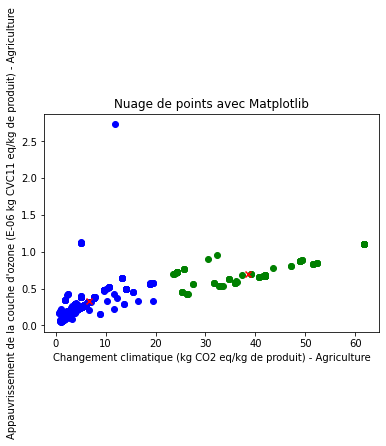

217991.2512456779
iteration 1  Inertie 173829.9547016328 Différence 44161.2965
iteration 2  Inertie 119013.1342288673 Différence 54816.8205
iteration 3  Inertie 103379.09897399621 Différence 15634.0353
iteration 4  Inertie 99712.68687200401 Différence 3666.4121
iteration 5  Inertie 99520.25994814628 Différence 192.4269
iteration 6  Inertie 99447.5869693965 Différence 72.6730
iteration 7  Inertie 99431.79555420022 Différence 15.7914
iteration 8  Inertie 99431.79555420022 Différence 0.0000


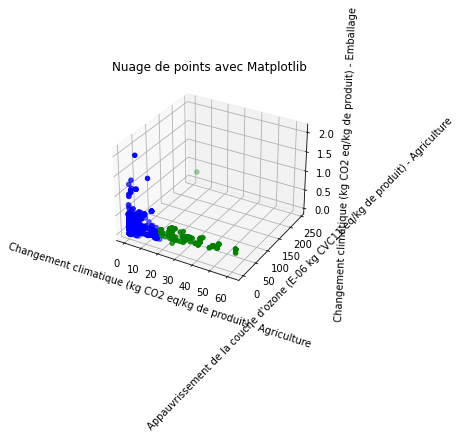

In [39]:
exclude_names =  ["DQR","DQR - P","DQR - TiR","DQR - GR","DQR - TeR","Code AGB","Code CIQUAL","Groupe d'aliment","Sous-groupe d'aliment","Nom du Produit en Français","LCI Name","Nom et code"]
names_ = list(attribut if attribut not in exclude_names else None for attribut in data_etape.columns)
names = list(i for i in names_ if i)
data_etape_filter = copy.deepcopy(data_etape.loc[data_etape["DQR"] <= 3])
viande_liste = ["viandes cuites", "charcuteries", "viandes crues","autres produits à base de viande"]
data_etape_filter2 = copy.deepcopy(data_etape_filter.loc[data_etape_filter["Groupe d'aliment"] == "viandes, œufs, poissons"])


dataset = data_etape_filter2[["Changement climatique (kg CO2 eq/kg de produit) - Agriculture","Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit) - Agriculture"]]
les_centres, l_affectation = clust.kmoyennes(2,dataset , 0.005, 1000)
clust.affiche_resultat(dataset,les_centres,l_affectation)

dataset = data_etape_filter[["Changement climatique (kg CO2 eq/kg de produit) - Agriculture","Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit) - Agriculture","Changement climatique (kg CO2 eq/kg de produit) - Emballage"]]
les_centres, l_affectation = clust.kmoyennes(2,dataset , 0.005, 1000)
clust.affiche_resultat3D(dataset,les_centres,l_affectation)


Nos attributs nous permettent bien de distinguer deux clusters. Nous avons choisi k=2 car nous voulons distinguer les bons/moyens aliments des mauvais.
## Affichage du contenu des cluster et analyse

In [33]:
cluster_1 = l_affectation[0]
cluster_2 = l_affectation[1]

data_etape_array = np.array(data_etape_filter["Groupe d'aliment"])
data_clust_1 = data_etape_array[cluster_1]
data_clust_2 = data_etape_array[cluster_2]
key_1 = list(set(data_clust_1))
key_2 = list(set(data_clust_2))
dict_1 = dict()
dict_2 = dict()
for elt in key_1:
    dict_1[elt] = 0

for elt in data_clust_1:
    dict_1[elt] +=1
    
for elt in key_2:
    dict_2[elt] = 0
    
for elt in data_clust_2:
    dict_2[elt] +=1

print(dict_1)
print(dict_2)

{'lait et produits laitiers': 179, 'viandes, œufs, poissons': 261, 'entrées et plats composés': 237, 'boissons': 114, 'glaces et sorbets': 2, 'produits céréaliers': 286, 'matières grasses': 20, 'produits sucrés': 27, 'aides culinaires et ingrédients divers': 92, 'fruits, légumes, légumineuses et oléagineux': 296, 'aliments infantiles': 21}
{'entrées et plats composés': 13, 'viandes, œufs, poissons': 130, 'boissons': 4, 'matières grasses': 1, 'fruits, légumes, légumineuses et oléagineux': 1}


Le premier dictionnaire correspond au cluster Vert et le second au cluster Bleu. Ici, nous remarquons que le cluster contenant les aliments nefastes pour l'environnement est très fortement dominé par de le groupe "viandes, oeufs, poissons". Nous allons donc analyser ces données en affichant le nom des produits.

In [36]:
cluster_1 = l_affectation[0]
cluster_2 = l_affectation[1]

data_etape_array = np.array(data_etape_filter["Nom du Produit en Français"])
data_clust_1 = data_etape_array[cluster_1]
data_clust_2 = data_etape_array[cluster_2]
key_1 = list(set(data_clust_1))
key_2 = list(set(data_clust_2))
dict_1 = dict()
dict_2 = dict()
for elt in key_1:
    dict_1[elt] = 0

for elt in data_clust_1:
    dict_1[elt] +=1
    
for elt in key_2:
    dict_2[elt] = 0
    
for elt in data_clust_2:
    dict_2[elt] +=1

print(dict_1)
print(dict_2)

{'Cassoulet au canard ou oie, appertisé': 1, 'Ravioli chinois à la vapeur à la crevette, cuit': 1, 'Fromage de brebis à pâte molle et croûte fleurie': 1, 'Pâte à pizza cuite': 1, 'Crêpe ou Galette aux noix de St Jacques': 1, 'Rillettes de poulet': 1, 'Gorgonzola': 1, 'Mangue importée par bateau, pulpe, crue': 1, 'Saucisse sèche': 1, 'Pâte feuilletée pur beurre, crue': 1, 'Brie de Melun': 1, 'Cookie aux pépites de chocolat': 1, 'Artichaut, coeur, appertisé, égoutté': 1, 'Pâte feuilletée, cuite': 1, 'Boulgour de blé, cru': 1, 'Jambon de poulet ou Blanc de poulet en tranche': 1, 'Soupe au pistou, préemballée à réchauffer': 1, 'Poulet, viande, crue': 1, 'Fromage à pâte molle et croûte lavée, allégé environ 13% MG': 1, 'Porc, carré, cru': 1, 'Céleri branche, cuit': 1, 'Andouille, réchauffée à la poêle': 1, 'Haricot vert importé par avion, cru': 1, 'Cola, non sucré, avec édulcorants, sans caféine': 1, 'Saucisson sec': 1, "Jambon à l'os braisé": 1, 'Tortilla souple (à garnir), à base de blé':

Cette partie de l'analyse est souvent réservée à un expert dans le domaine qui va pouvoir nous aider à distinguer certains groupes. Ici, après des recherches internet et analyse du contenu des dictionnaires nous remarquons que le cluster contenant les aliments nefastes pour l'environnement est très fortement dominé par les viandes de type ovines et bovines.

### Conclusion du problème non supervisé:
On remarque que le premier cluster contient toute sorte d'aliments et que le 2e cluster qui a un impact beaucoup plus fort sur l'environnement contient principalement de la viande et plus précisemment de la viande bovine et ovine. Les viandes bovines et ovines seraient donc celles qui sont les plus néfastes pour l'environnement